# Analysis of Fatal Road Accidents in Australia since 1989

## Introduction

This project explores fatal road transport accidents in Australia from 1989. Using data sourced from the [Australian Road Deaths Database (ARDD)](https://catalogue.data.infrastructure.gov.au/dataset/australian-road-deaths-database), the analysis examines the demographic, geographic, and temporal distribution of fatal accidents.

The key objectives of this analysis are to:

* Identify the demographic groups most affected by fatal road accidents

* Examine how fatalities are distributed across Australian states and territories

* Explore patterns in accident timing (days of the week, months of the year)

* Analyze trends over time in road fatalities overall and among vulnerable road users (pedestrians, cyclists)

* The analysis applies data cleaning, missing value handling, and exploratory data visualization techniques to highlight significant trends and support future road safety research efforts.

## Key Findings

- Road fatalities have steadily declined from 1989 to 2021, both in raw numbers and when adjusted per 100,000 population.

- Young drivers (aged 17–25) historically had the highest fatality rates but have seen substantial improvements, likely due to licensing restrictions.

- Males account for approximately 70% of all road fatalities, a ratio that has remained consistent over time.

- The majority of fatal accidents occur between Friday and Sunday, with Friday afternoon being the most dangerous time period.

- New South Wales, Victoria, and Queensland account for more than 80% of all fatalities.

- Pedestrian fatalities have decreased over time, but cyclist fatalities have remained relatively constant since the mid-1990s.

# Part 1: Data Checking


## 1.1 Reading Data and Importing Libraries

Import the necessary libraries and read the dataset into a pandas DataFrame. The dataset is in CSV format and contains information about fatal road accidents in Australia from 1989. The dataset is updated monthly and includes various attributes such as the date of the accident, location, vehicle type, and demographic information about the individuals involved in the accidents.

In [1]:
# Set the directory for the script

import sys
sys.path.append("../scripts") 

# Importing the required libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Using Pandas to read the csv file and store it in a dataframe

df = pd.read_csv("../data/Crash_Data.csv", low_memory=False)

## 1.2 Exploring the Data and Checking the Data Types

Briefly inspect to check column names, types, summary statistics, and overall structure.

In [44]:
# View the first and last five rows of the dataset

display(df.head())
display(df.tail())

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20212133,Vic,9,2021,Sunday,0:30,Single,NaN,NaN,NaN,...,38,Inner Regional Australia,Melbourne - Outer East,Yarra Ranges (S),Arterial Road,No,No,26_to_39,Weekend,Night
1,20214022,SA,9,2021,Saturday,23:31,Multiple,No,No,No,...,28,Major Cities of Australia,Adelaide - North,Playford (C),NaN,No,No,26_to_39,Weekend,Night
2,20212096,Vic,9,2021,Saturday,23:00,Single,NaN,NaN,NaN,...,19,Inner Regional Australia,Hume,Wangaratta (RC),Access road,No,No,17_to_25,Weekend,Night
3,20212145,Vic,9,2021,Saturday,22:25,Single,NaN,NaN,NaN,...,23,Outer Regional Australia,Hume,Wangaratta (RC),Arterial Road,No,No,17_to_25,Weekend,Night
4,20212075,Vic,9,2021,Saturday,5:15,Single,NaN,NaN,NaN,...,46,Major Cities of Australia,Melbourne - South East,Casey (C),Local Road,No,No,40_to_64,Weekend,Night


,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
52838,19891246,NSW,1,1989,Wednesday,17:05,Single,Yes,NaN,No,...,5,NaN,NaN,NaN,NaN,No,No,0_to_16,Weekday,Day
52839,19895088,WA,1,1989,Monday,6:00,Single,No,NaN,No,...,19,NaN,NaN,NaN,NaN,Yes,No,17_to_25,Weekday,Day
52840,19895088,WA,1,1989,Monday,6:00,Single,No,NaN,No,...,17,NaN,NaN,NaN,NaN,Yes,No,17_to_25,Weekday,Day
52841,19895088,WA,1,1989,Monday,6:00,Single,No,NaN,No,...,17,NaN,NaN,NaN,NaN,Yes,No,17_to_25,Weekday,Day
52842,19896063,Tas,1,1989,Tuesday,12:40,Multiple,No,NaN,No,...,63,NaN,NaN,NaN,NaN,No,No,40_to_64,Weekday,Day


In [45]:

# Get information about the dataset
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52843 entries, 0 to 52842
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Crash ID                       52843 non-null  int64 
 1   State                          52843 non-null  object
 2   Month                          52843 non-null  int64 
 3   Year                           52843 non-null  int64 
 4   Dayweek                        52843 non-null  object
 5   Time                           52803 non-null  object
 6   Crash Type                     52843 non-null  object
 7   Bus Involvement                52821 non-null  object
 8   Heavy Rigid Truck Involvement  32328 non-null  object
 9   Articulated Truck Involvement  52821 non-null  object
 10  Speed Limit                    52141 non-null  object
 11  Road User                      52843 non-null  object
 12  Gender                         52816 non-null  object
 13  A

None

In [46]:
# Take the number of rows and columns in the dataset, and the number of unique Crash ID's, and print them out in a sentence. 

print(f"Dataset contains {df.shape[0]:,} rows and {df.shape[1]} columns, "f"with {df['Crash ID'].nunique():,} unique crash IDs.")


Dataset contains 52,843 rows and 23 columns, with 47,567 unique crash IDs.


The table below provides a high-level summary of each column, including:
- The number of unique values
- The most frequently occurring value (where applicable)
- The count of that most common value
- The number of missing entries

Note: For identifier fields like `Crash ID`, the "top value" has limited interpretive value, but is more informative in fields such as `State` or `Age`.

In [47]:
# Creating and populating a summary dataframe using pandas
summary_df = pd.DataFrame({
    'Column Name': df.columns, # Getting the column names
    'Unique Values': [df[col].nunique() for col in df.columns], # Counting the number of unique values in each column
    'Most Common Value': [df[col].mode()[0] for col in df.columns], # Finding the most common value in each column using mode function
    'Count of Most Common Value': [df[col].value_counts().iloc[0] for col in df.columns], # Counting the number of times the most common value appears in each column
    'Missing Values': df.isnull().sum().values # Counting the number of blank values in each column
})

# Displaying the summary dataframe
display(summary_df)


,Column Name,Unique Values,Most Common Value,Count of Most Common Value,Missing Values
0,Crash ID,47567,19891474,35,0
1,State,8,NSW,16293,0
2,Month,12,12,4721,0
3,Year,33,1989,2800,0
4,Dayweek,7,Saturday,9696,0
5,Time,1413,15:00,1144,40
6,Crash Type,2,Single,29249,0
7,Bus Involvement,2,No,51835,22
8,Heavy Rigid Truck Involvement,2,No,30735,20515
9,Articulated Truck Involvement,2,No,47476,22


The summary table above shows the column names, the number of unique values in each column, the most common value in each column and the number of times the most common value appears. From the data we can see that the there are 47567 crashes in the dataset that contains 52843 fatalities, the most deadly accident on record involved 35 fatalities (Kempsey Bus Crash 1989), and the most common gender is Male.

In [48]:
# Calculate statistics for the 'Age' column

mean_age = df['Age'].mean()
median_age = df['Age'].median()
min_age = df['Age'].min()
max_age = df['Age'].max()

print(f"The average age of individuals involved in fatal road crashes was {mean_age:.1f} years "f"(median: {median_age}, range: {min_age}–{max_age}).")


The average age of individuals involved in fatal road crashes was 39.7 years (median: 34.0, range: -9–101).


# Part 2: Data Preparation

## 2.1 Checking for null or missing values

From information provided in the [ARDD data dictionary](https://data.gov.au/dataset/ds-dga-5b530fb8-526e-4fbf-b0f6-aa24e84e4277/distribution/dist-dga-59055fed-d4f1-4a81-b3ee-75cb438009c6/details?q=ardd) we know that missing values are represented by '-9', 'Unspecified' or 'Other/-9'. We will search for these values and replace them with null values (NaN). 

In [49]:
# Firstly, we will find the number of blank values in the dataset
blank_values = df.isnull().sum()

# Secondly, we will find the number of values set to '-9' which according to the data book are also missing data. 
neg_nine_values = df.isin([-9, 'Other/-9']).sum()

# Thirdly there are a handful of 'Unspecified' value in the dataset, so we will also sum them
unspecified_values = (df == "Unspecified").sum()

# We will now sum all the missing values
total_missing = blank_values + neg_nine_values + unspecified_values

# Displaying counts of blank, '-9', 'unspecified', and total missing values per column

missing_data_summary = pd.DataFrame({
    'Blank Values': blank_values,
    '-9 Values': neg_nine_values,
    'Unspecified Values': unspecified_values,
    'Total of Missing Values': total_missing
})

display(missing_data_summary)

,Blank Values,-9 Values,Unspecified Values,Total of Missing Values
Crash ID,0,0,0,0
State,0,0,0,0
Month,0,0,0,0
Year,0,0,0,0
Dayweek,0,0,0,0
Time,40,0,0,40
Crash Type,0,0,0,0
Bus Involvement,22,0,0,22
Heavy Rigid Truck Involvement,20515,0,0,20515
Articulated Truck Involvement,22,0,0,22


Null or missing values will be replaced with NaN for easier analysis and columns with high proportions of missing data will be dropped from further analysis to ensure data quality and avoid skewed interpretations.

Heavy Rigid Truck Involvement, National Remoteness Areas, SA4 Name 2016, National LGA Name 2017, and National Road Type will be dropped.

## 2.2 Data Cleaning

Data is cleaned using a script that:
- Replaces missing values with NaN.
- Map numeric month values to month names and create a new column for month names.
- Drops columns with high proportions of missing data.
- Drops entries from the current year as that data is not yet complete.

In [50]:
from data_cleaning import full_clean_pipeline

df = full_clean_pipeline()

# Create a dynamic year variable to get the latest year in the dataset to use in the analysis
latest_year = df['Year'].max()
earliest_year = df['Year'].min()
print(f"The dataset contains data from {earliest_year} to {latest_year}.")


The dataset contains data from 1989 to 2021.


## 2.3 Visualise the Remaining Missing Data

A quick visualisation of the remaining missing data will be created to help identify any remaining issues. 

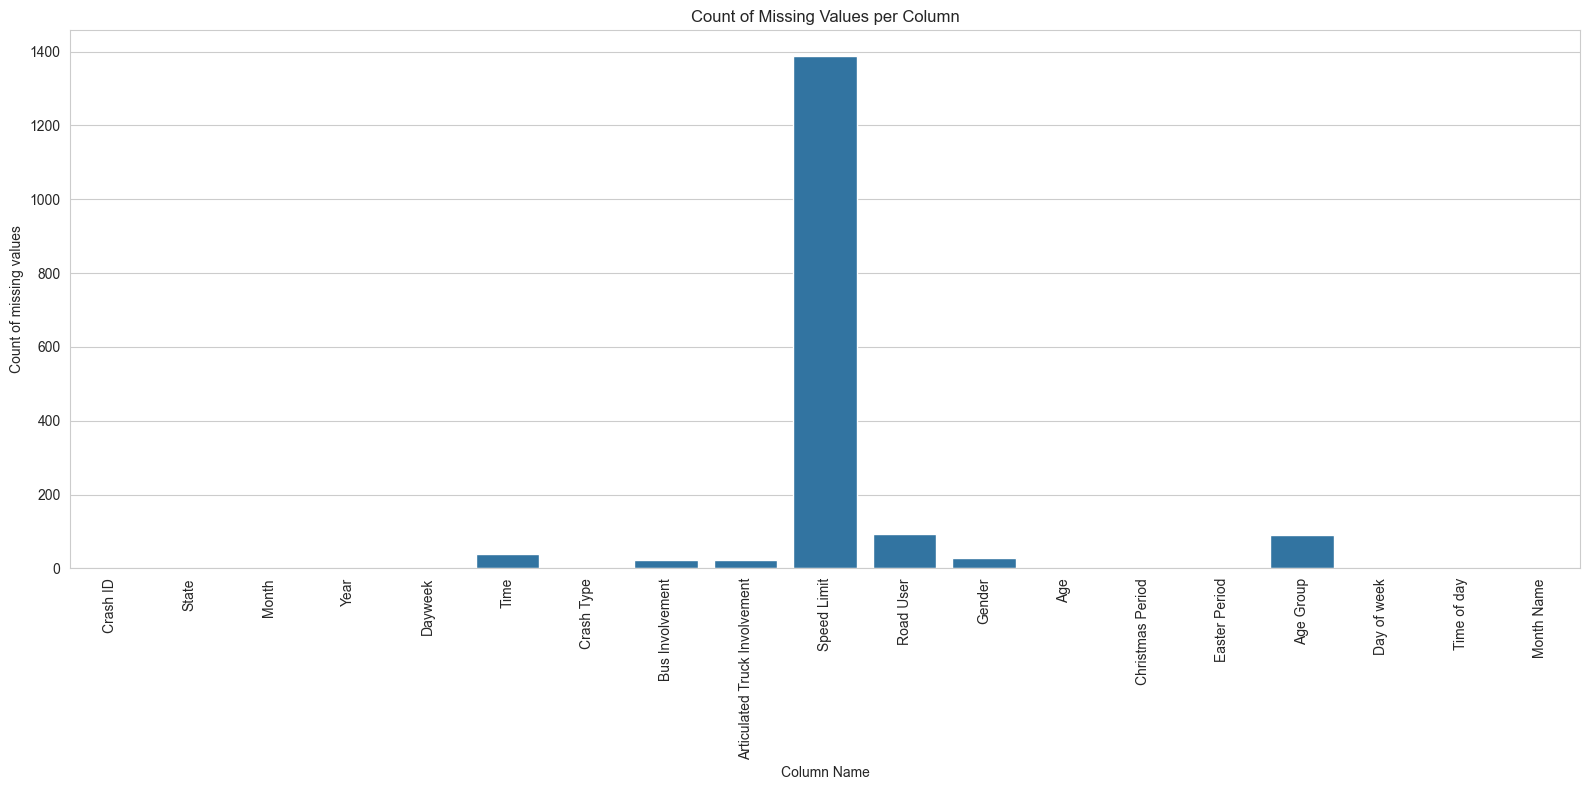

In [51]:
# Creating a bar chart of the missing data
sns.set_style('whitegrid')
missing_value_count = df.isnull().sum() # We could instead call on the missing_data_summary dataframe using the 'total_missing' column, but defining a new variable is easier to read and shorter to type
plt.figure(figsize=(16,8))
sns.barplot(x=missing_value_count.index, 
            y=missing_value_count)
plt.title('Count of Missing Values per Column')
plt.xlabel('Column Name')
plt.ylabel('Count of missing values')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


The above chart shows the count of missing values, however since some of these numbers are a very small portion of the data, it is difficult to see the distribution of missing values. Therefore, we will create a bar chart of the percentage of missing values per column and set the range on the y-axis to 0-10%.


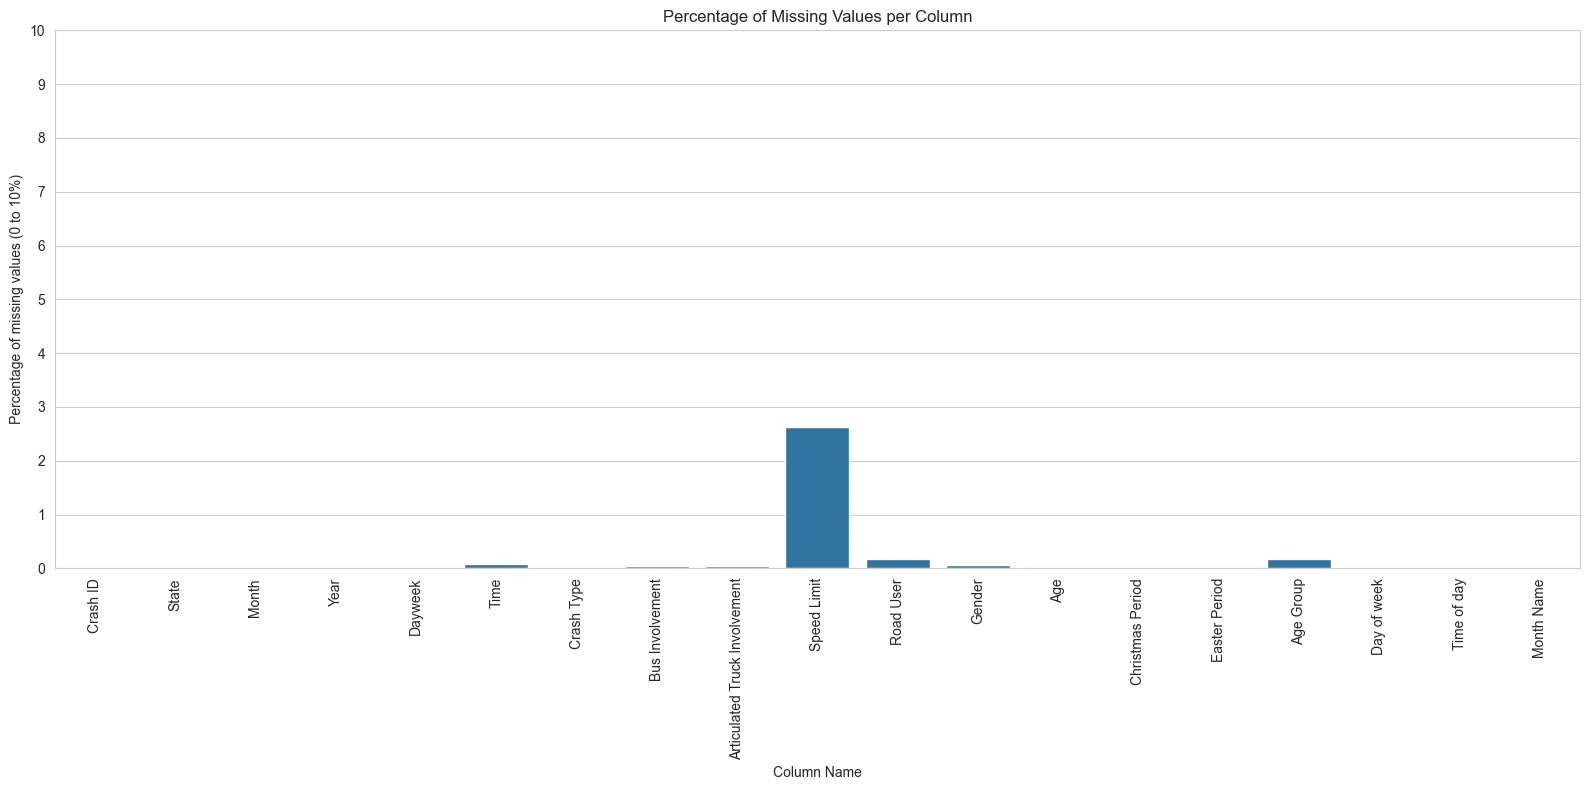

In [52]:
# Creating a bar chart of the percentage of missing data
sns.set_style('whitegrid')
missing_values_percentage = (missing_value_count / len(df)) * 100
plt.figure(figsize=(16,8))
sns.barplot(x=missing_values_percentage.index, 
            y=missing_values_percentage)
plt.title('Percentage of Missing Values per Column')
plt.xlabel('Column Name')
plt.ylabel('Percentage of missing values (0 to 10%)')
plt.xticks(rotation=90)
plt.yticks(range(0, 11, 1))
plt.tight_layout()
plt.show()

The above chart shows the percentage of missing values per column, with the Y-axis set to a range of 0 to 10%. Speed limit has the highest percentage of missing values at 2.6%. The remaining columns have a very low percentage of missing values, with the majority of columns having less than 0.5% missing values. These values will not be dropped from the main dataset, however when creating visualisations we may need to create new dataframes that drop rows with missing values.

## 2.4 Check for Duplicate Entries

In [53]:
# Checking for duplicate rows
duplicate_rows = df[df.duplicated()]
display(duplicate_rows)

# Checking for duplicate values in the Crash ID column
duplicate_crash_ids = df[df.duplicated(['Crash ID'])]
display(duplicate_crash_ids)


,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Articulated Truck Involvement,Speed Limit,Road User,Gender,Age,Christmas Period,Easter Period,Age Group,Day of week,Time of day,Month Name
473,20215012,WA,4,2021,Saturday,20:50,Single,No,No,110,Passenger,Male,16,No,No,0_to_16,Weekend,Night,April
1426,20203031,Qld,6,2020,Sunday,4:00,Single,No,No,70,Passenger,Female,14,No,No,0_to_16,Weekend,Night,June
1650,20202055,Vic,4,2020,Wednesday,17:30,Multiple,No,Yes,100,Pedestrian,NaN,-9,No,No,NaN,Weekday,Day,April
1651,20202055,Vic,4,2020,Wednesday,17:30,Multiple,No,Yes,100,Pedestrian,NaN,-9,No,No,NaN,Weekday,Day,April
1652,20202055,Vic,4,2020,Wednesday,17:30,Multiple,No,Yes,100,Pedestrian,NaN,-9,No,No,NaN,Weekday,Day,April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52623,19895071,WA,1,1989,Sunday,22:17,Single,No,No,110,Passenger,Male,19,No,No,17_to_25,Weekend,Night,January
52783,19892372,Vic,1,1989,Thursday,14:08,Multiple,No,No,60,Passenger,Female,65,No,No,65_to_74,Weekday,Day,January
52785,19892372,Vic,1,1989,Thursday,14:08,Multiple,No,No,60,Passenger,Female,65,No,No,65_to_74,Weekday,Day,January
52819,19896006,Tas,1,1989,Wednesday,20:20,Multiple,No,Yes,100,Passenger,Male,13,No,No,0_to_16,Weekday,Night,January


,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Articulated Truck Involvement,Speed Limit,Road User,Gender,Age,Christmas Period,Easter Period,Age Group,Day of week,Time of day,Month Name
14,20213026,Qld,9,2021,Wednesday,23:00,Multiple,No,No,NaN,Driver,Male,34,No,No,26_to_39,Weekday,Night,September
52,20212073,Vic,9,2021,Tuesday,12:30,Multiple,NaN,NaN,NaN,Driver,Female,71,No,No,65_to_74,Weekday,Day,September
59,20211068,NSW,9,2021,Tuesday,21:50,Single,No,No,60,Passenger,Female,6,No,No,0_to_16,Weekday,Night,September
63,20212015,Vic,9,2021,Thursday,19:33,Multiple,NaN,NaN,NaN,NaN,Male,15,No,No,0_to_16,Weekday,Night,September
64,20212015,Vic,9,2021,Thursday,19:33,Multiple,NaN,NaN,NaN,NaN,Male,16,No,No,0_to_16,Weekday,Night,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52832,19892409,Vic,1,1989,Saturday,22:54,Multiple,No,No,100,Driver,Male,29,No,No,26_to_39,Weekend,Night,January
52835,19891498,NSW,1,1989,Sunday,14:35,Multiple,No,No,80,Passenger,Male,2,Yes,No,0_to_16,Weekend,Day,January
52836,19893191,Qld,1,1989,Saturday,12:00,Multiple,No,Yes,60,Passenger,Female,22,No,No,17_to_25,Weekend,Day,January
52840,19895088,WA,1,1989,Monday,6:00,Single,No,No,110,Passenger,Male,17,Yes,No,17_to_25,Weekday,Day,January


In this dataset, Crash IDs represent a single event, but there are multiple rows for each Crash ID in some cases when there have been multiple fatalities in a crash. Since there appears to be no true duplicate rows, we will not drop any rows from the dataset.

## 2.5 Checking for Outliers

In this dataset we have a single continuous variable of interest, age. We will use a boxplot to check for outliers in this column.


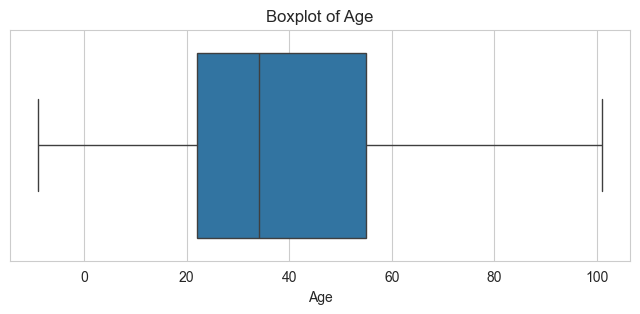

In [54]:
# Creating a boxplot to check for outliers in the Age column
plt.figure(figsize=(8,3))
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()


The above boxplot shows that there are no outliers in the Age column. Checking for outliers using the IRQ method will confirm this.


In [55]:
# Creating a function to calculate the IRQ
def IRQ_and_bounds(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IRQ = Q3 - Q1
    lower_bound = Q1 - (1.5 * IRQ)
    upper_bound = Q3 + (1.5 * IRQ)
    return IRQ, lower_bound, upper_bound

# Using the IRQ function to calculate the IRQ of the Age column
IRQ_and_bounds(df['Age'])

# Using the IRQ function to check for outliers in the Age column

irq_value, lower_bound, upper_bound = IRQ_and_bounds(df['Age'])

print(f"IRQ: {irq_value}, Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# Using the IRQ function to check for outliers in the Age column
def identify_outliers(column):
    _, lower_bound, upper_bound = IRQ_and_bounds(column)
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

outliers = identify_outliers(df['Age'])
print(f"Outliers: {outliers.values}")


IRQ: 33.0, Lower Bound: -27.5, Upper Bound: 104.5
Outliers: []


# Part 3: Data Visualisation

This section explores patterns in fatal road transport accidents in Australia from 1989 to 2021. Each row in the dataset represents a single fatality and includes demographic, geographic, and temporal details.

The visualisations aim to examine:

* The demographic characteristics of individuals involved in fatal crashes

* The geographic distribution of fatal incidents across Australian states and territories

* Temporal trends, including changes over time and differences by day of week or time of year

* Shifts in the demographic profile of fatalities over time

* Trends in pedestrian and cyclist fatalities, and whether these have changed meaningfully since 1989

These visual insights provide context for evaluating the impact of road safety initiatives and identifying groups most at risk.

## 3.1 Demographic Analysis of Fatal Road Accidents in Australia

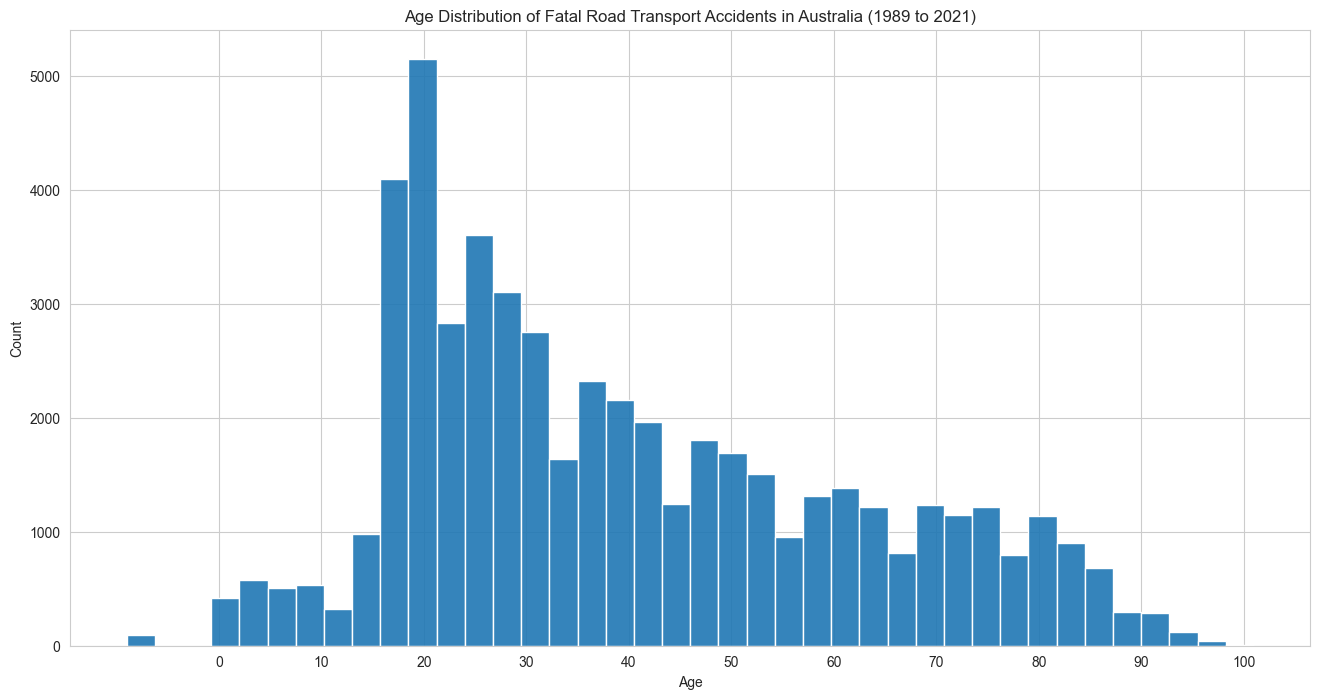

In [56]:
# Age and Sex distribution of fatal road transport accidents in Australia
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
sns.histplot(df['Age'], bins=40,
            kde= False,
            alpha=0.9)
plt.title(f"Age Distribution of Fatal Road Transport Accidents in Australia ({earliest_year} to {latest_year})")
plt.xlabel('Age')
plt.xticks(range(0, 101, 10))
plt.ylabel('Count')
plt.show()


The histogram shows a notable peak in the frequency of fatal accidents involving people in their 20's and early 30's. After the age of around 35 there is a general decline in the frequency of fatal accidents.

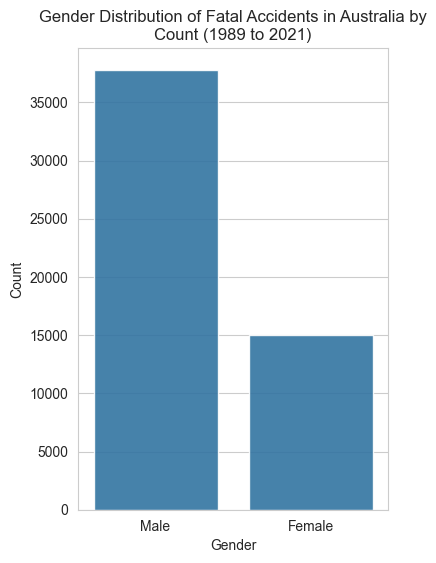

In [79]:
# Plot of fatal accidents by gender

sns.set_style('whitegrid')
plt.figure(figsize=(4,6))
sns.countplot(x='Gender', 
            data=df,
            alpha=0.9)
plt.title(f"Gender Distribution of Fatal Accidents in Australia by\nCount ({earliest_year} to {latest_year})")
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


The gender distribution of fatal accidents shows a significantly large number of males are represented in the data than females, we will express this as a percentage.

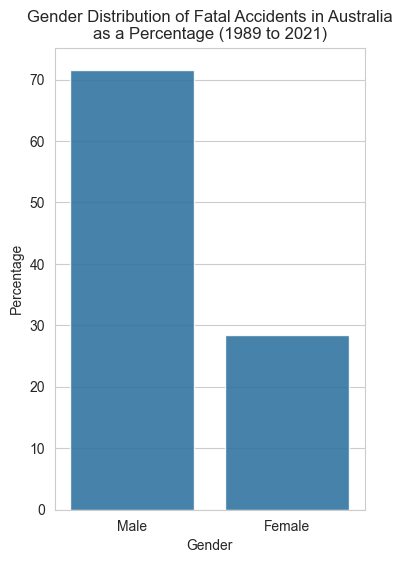

In [80]:
# Gender distribution of fatal accidents by gender as a percentage
gender_percentage = (df['Gender'].value_counts(normalize=True) * 100).reset_index()
gender_percentage.columns = ['Gender', 'Percentage']

# Plotting
plt.figure(figsize=(4,6))
sns.set_style('whitegrid')
sns.barplot(x='Gender', 
            y='Percentage', 
            data=gender_percentage, 
            alpha=0.9)
plt.title(f"Gender Distribution of Fatal Accidents in Australia\nas a Percentage ({earliest_year} to {latest_year})")
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.show()


The bar graph above shows that over 70% of road transport fatalities are male compared to approximately 30% female. 

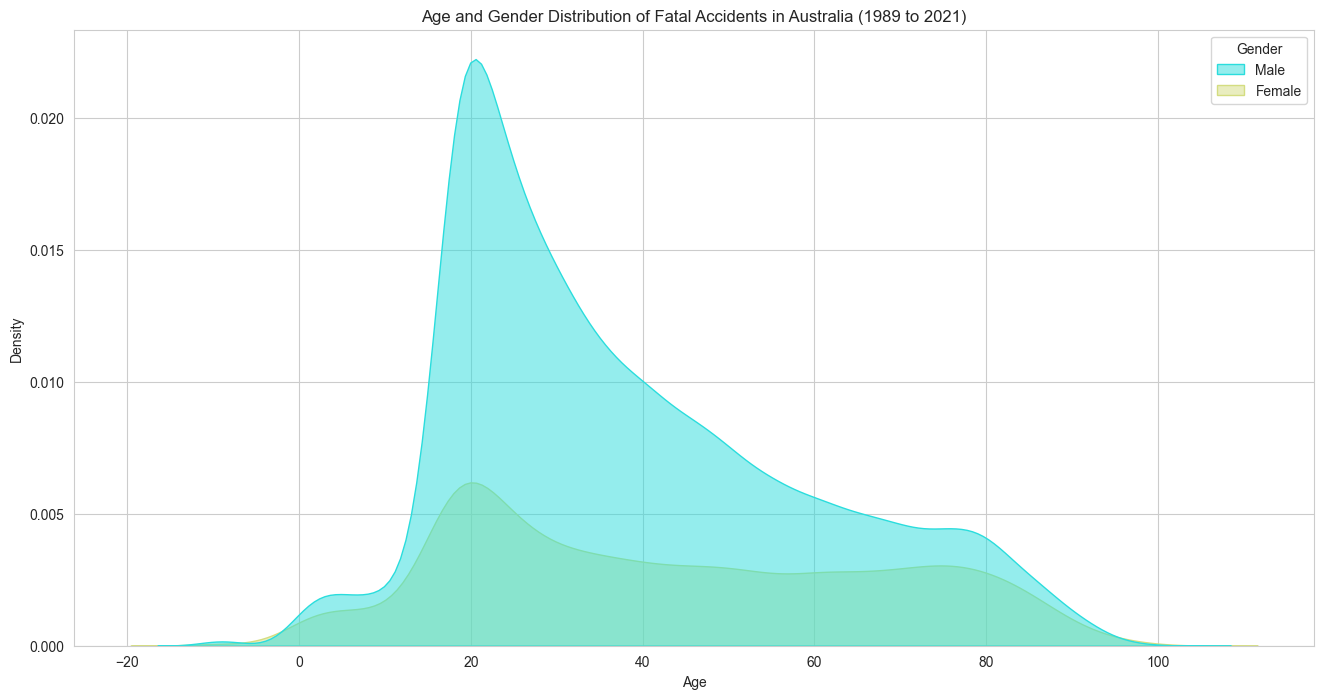

In [81]:
# Density plot of age and gender
plt.figure(figsize=(16,8))
sns.set_style('whitegrid')
sns.kdeplot(data=df, 
            x='Age', 
            hue='Gender', 
            fill=True, 
            palette='rainbow', 
            alpha=0.5)
plt.title(f"Age and Gender Distribution of Fatal Accidents in Australia ({earliest_year} to {latest_year})")
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


The density plot above shows the age distribution of fatal accidents in Australia separated by gender. It can be seen that both males and females show a peak around the age of 20, and that the age distribution of fatal accidents are relatively similar between the two genders.

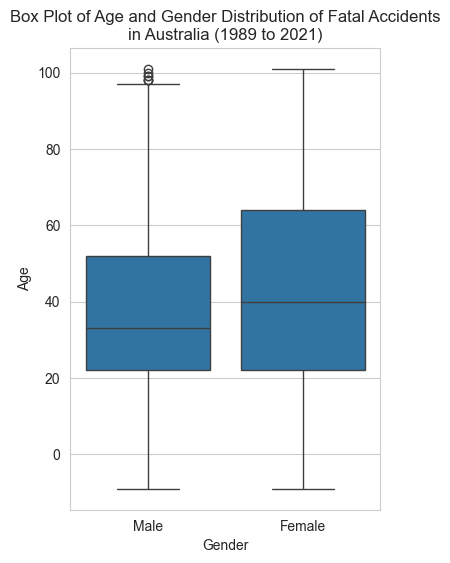

In [83]:
# Box plot of age and gender distribution
plt.figure(figsize=(4,6))
sns.set_style('whitegrid')
sns.boxplot(x='Gender', 
            y='Age', 
            data=df)
plt.title(f"Box Plot of Age and Gender Distribution of Fatal Accidents\nin Australia ({earliest_year} to {latest_year})")
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()


The above box plots show that the median age appear to be slightly higher for males than females, with several male outliers appearing when the data is segregated by gender.

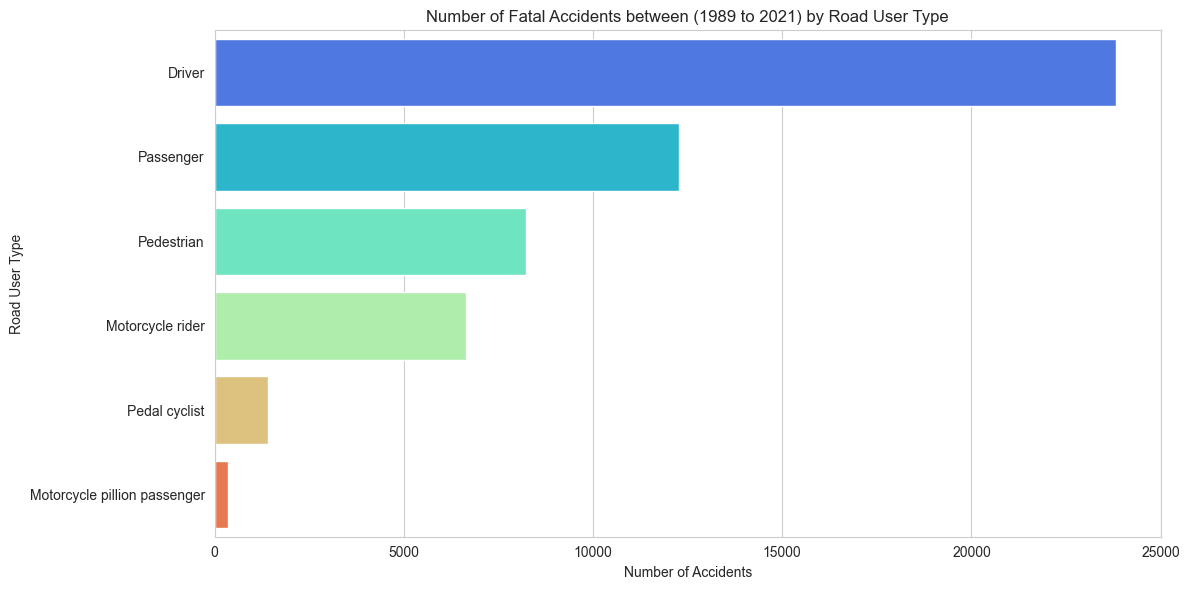

In [84]:
# Calculate the number of accidents by road user
road_user_counts = df['Road User'].value_counts().reset_index()
road_user_counts.columns = ['Road User', 'Accidents']

# Fatalities by Road User Type
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.barplot(x='Accidents', 
            y='Road User', 
            data=road_user_counts, 
            hue='Road User', 
            palette='rainbow')
plt.title(f"Number of Fatal Accidents between ({earliest_year} to {latest_year}) by Road User Type")
plt.xlabel('Number of Accidents')
plt.ylabel('Road User Type')
plt.tight_layout()
plt.show()

The above horizontal bar chart shows a breakdown of the number of fatal accidents by road user type. From that chart it can be seen that the majority of fatal accidents involve car occupants, followed by pedestrians and motorcyclists.

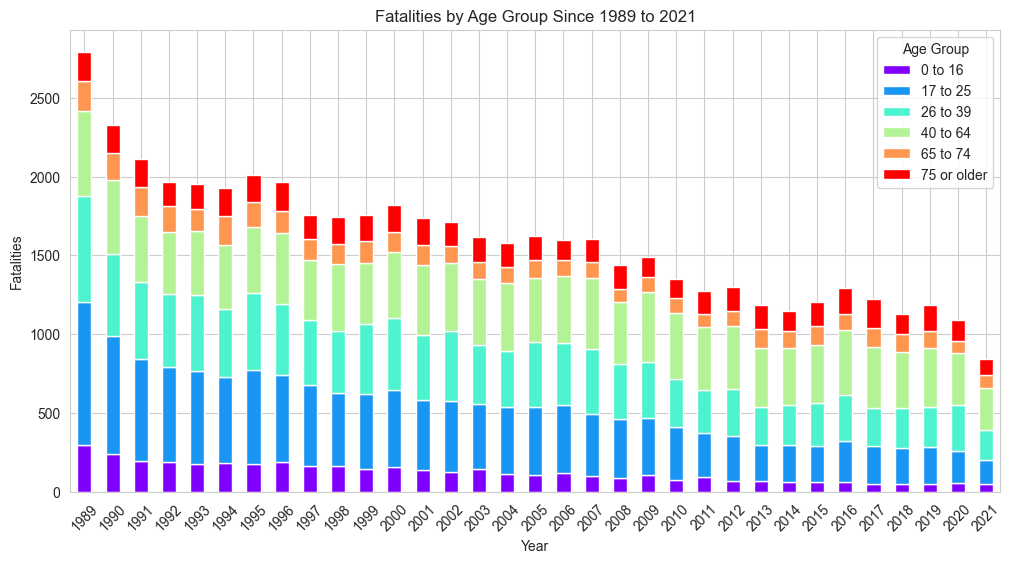

In [85]:
# Calculate the number of accidents by road user
age_group_fatalities = df.groupby(['Year', 'Age Group'])['Crash ID'].size().reset_index(name='Fatalities')

# Using a pivot table to transform the data into wide format
age_group_fatalities_pivot = age_group_fatalities.pivot(index='Year', 
                                                        columns='Age Group', 
                                                        values='Fatalities')
age_group_fatalities_pivot.columns = age_group_fatalities_pivot.columns.str.replace('_', ' ') # Remove underscores from column names so they appear more nearly in the legend

# Plotting
sns.set_style('whitegrid')
age_group_fatalities_pivot.plot(kind='bar', 
                                stacked=True, 
                                figsize=(12, 6), 
                                cmap='rainbow')
plt.title(f"Fatalities by Age Group Since {earliest_year} to {latest_year}")
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Fatalities')
plt.legend(title='Age Group')
plt.show()


The above stacked bar graph shows the proportions of fatalities by age group from 1989. The graph shows a general decline in fatalities while proportions remain relatively consistent. 

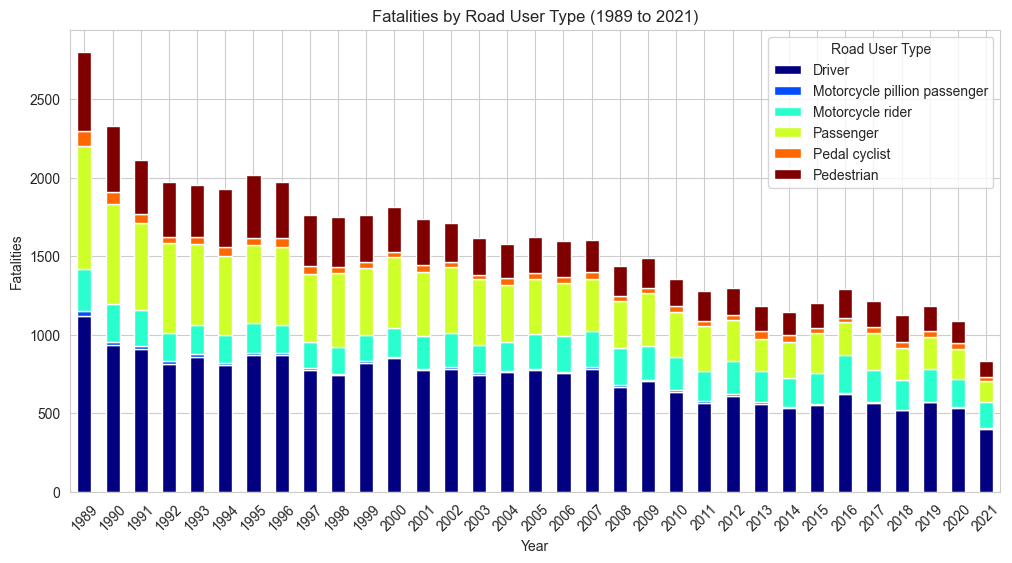

In [86]:
# Calculate the number of accidents by road user 
road_user_fatalities = df.groupby(['Year', 'Road User'])['Crash ID'].size().reset_index(name='Fatalities')

# Using a pivot table to transform the data into wide format
road_user_fatalities_pivot = road_user_fatalities.pivot(index='Year', 
                                                        columns='Road User', 
                                                        values='Fatalities')

# Plotting
sns.set_style('whitegrid')
road_user_fatalities_pivot.plot(kind='bar', 
                                stacked=True, 
                                figsize=(12, 6), 
                                cmap='jet')
plt.title(f"Fatalities by Road User Type ({earliest_year} to {latest_year})")
plt.xlabel('Year')
plt.ylabel('Fatalities')
plt.xticks(rotation=45)
plt.legend(title='Road User Type')
plt.show()

The above stacked bar graph shows the proportions of fatalities by road user type from 1989 to 2021. The graph shows a general decline in fatalities, and proportions that remain relatively consistent.

## 3.2 Geographic Analysis of Fatal Road Accidents in Australia

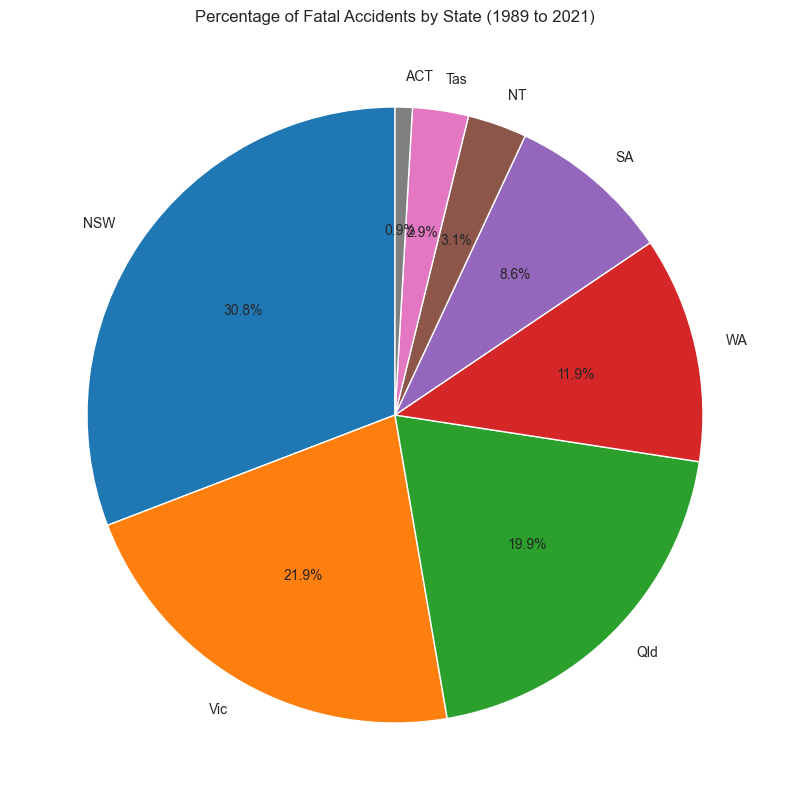

In [87]:
# Pie chart of fatal accidents by State
# Firstly, calculate the number of accidents by state. 
state_counts = df['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Accidents']

plt.figure(figsize=(10,10))
plt.pie(x=state_counts['Accidents'], 
        labels=state_counts['State'], 
        autopct='%1.1f%%', 
        startangle=90)
plt.title(f"Percentage of Fatal Accidents by State ({earliest_year} to {latest_year})")
plt.show()

The pie chart shows that the majority of fatal accidents occur in New South Wales (31%), followed by Victoria (30%) and Queensland (20%).

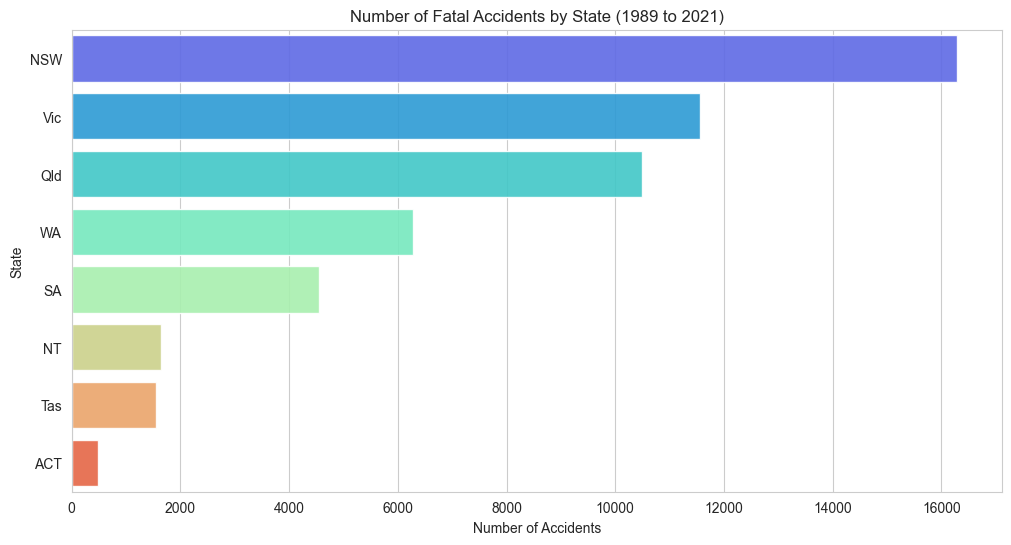

In [88]:
# Bar chart of fatal accidents by State
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.barplot(x='Accidents', 
            y='State', 
            data=state_counts,
            hue='State',
            alpha=0.9,
            palette='rainbow')
plt.title(f"Number of Fatal Accidents by State ({earliest_year} to {latest_year})")
plt.xlabel('Number of Accidents')
plt.ylabel('State')
plt.show()


The above bar graph is an alternative visualisation of the number of fatal accidents by state.

## 3.3 Temporal Analysis of Fatal Road Accidents in Australia

### Accidents by Month of Year

In [66]:
# Now we will calculate the number of accidents by month

month_counts = df['Month Name'].value_counts().reset_index()
month_counts.columns = ['Month', 'Accidents']

# Sorting the months in order by converting them to a categorical variable and sorting by the month order

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
            'August', 'September', 'October', 'November', 'December']
month_counts['Month'] = pd.Categorical(month_counts['Month'], categories=month_order, ordered=True)
month_counts = month_counts.sort_values('Month')


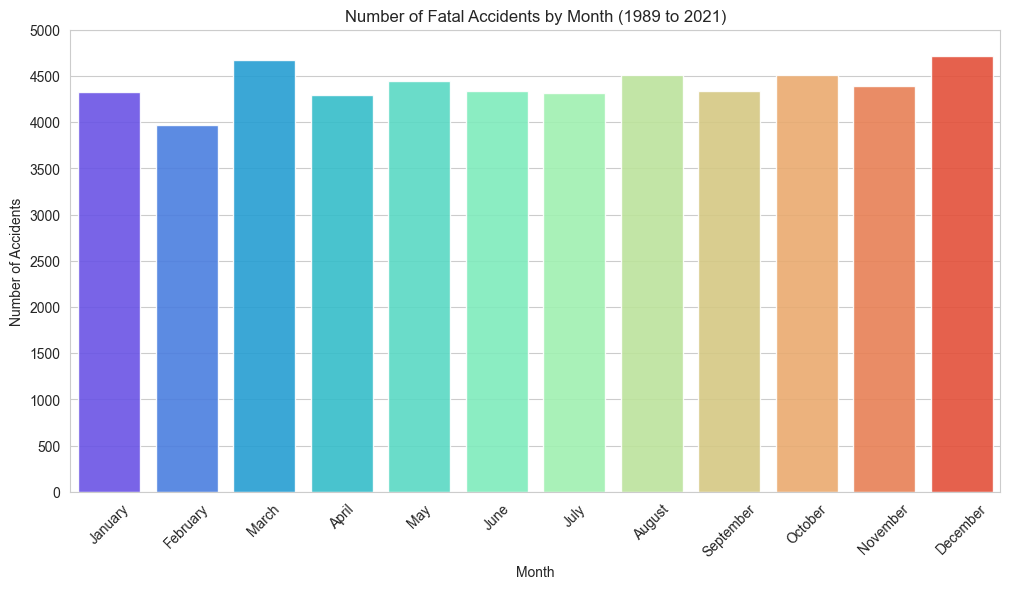

In [89]:
# Plot the number of accidents by month

sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.barplot(x='Month', 
            y='Accidents', 
            data=month_counts, 
            hue='Month', 
            palette='rainbow',
            alpha=0.9)
plt.title(f"Number of Fatal Accidents by Month ({earliest_year} to {latest_year})")
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.yticks(range(0, 5500, 500))
plt.show()


The above bar chart shows that the number of fatal accidents is relatively consistent throughout the year with December and March having a slightly higher number of accidents than other months. 

In [68]:
# Count accidents by day of the week
day_counts = df['Dayweek'].value_counts().reset_index()
day_counts.columns = ['Day', 'Accidents']

# Sort the days in order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts['Day'] = pd.Categorical(day_counts['Day'], categories=day_order, ordered=True)
day_counts = day_counts.sort_values('Day')


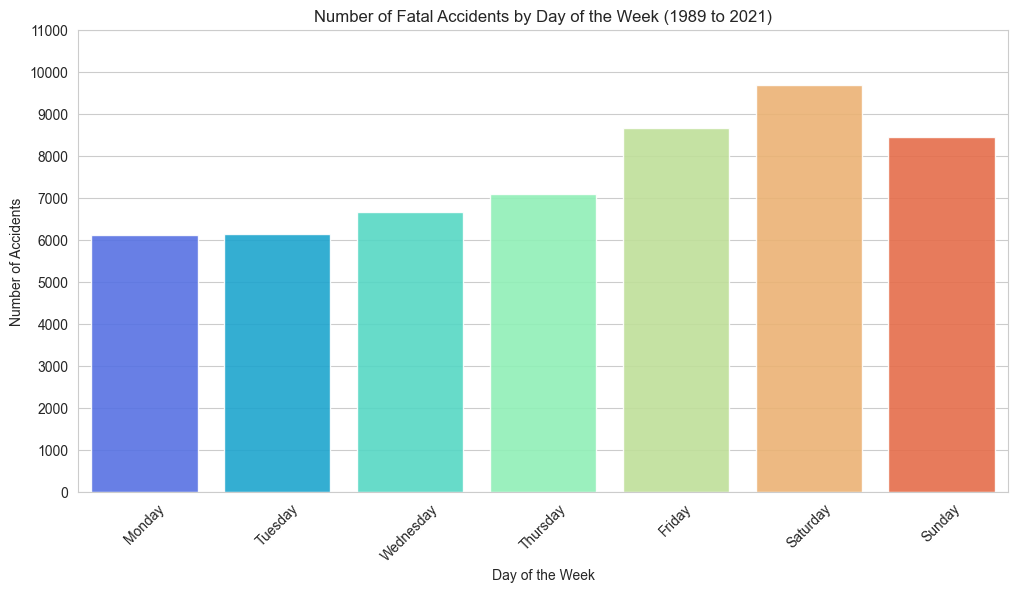

In [90]:
# Plot the number of accidents by day of the week

sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.barplot(x='Day', 
            y='Accidents', 
            data=day_counts, 
            hue='Day', 
            palette='rainbow',
            alpha=0.9)
plt.title(f"Number of Fatal Accidents by Day of the Week ({earliest_year} to {latest_year})")
plt.xlabel('Day of the Week')
plt.yticks(range(0, 12000, 1000))
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


The above bar chart shows that the number of fatal accidents is highest on Saturday, followed by Friday and Sunday. We can also plot the percentage of accidents by day of the week below.

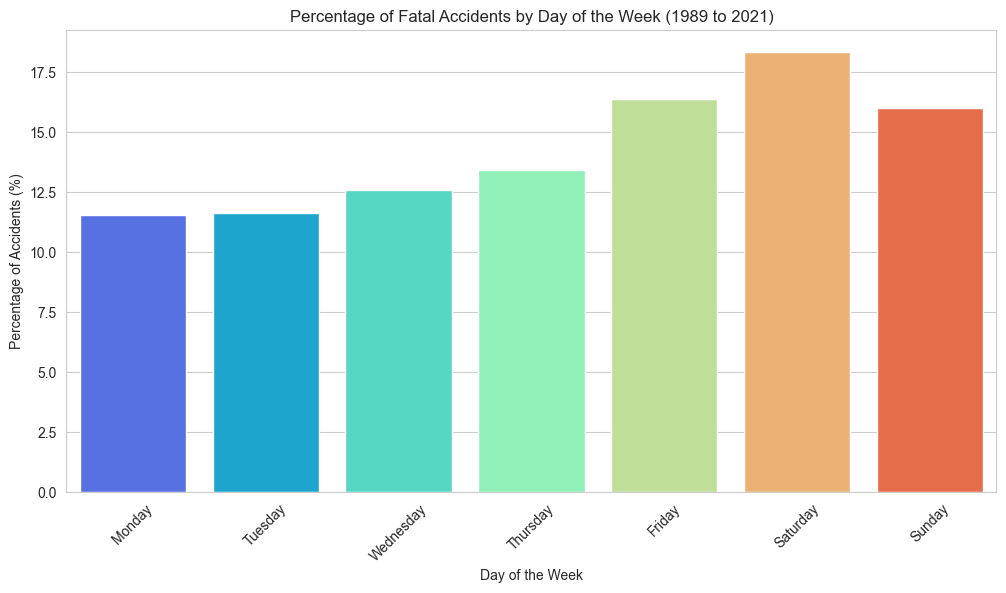

In [91]:
day_counts['Percentage'] = (day_counts['Accidents'] / day_counts['Accidents'].sum()) * 100
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.barplot(x='Day', 
            y='Percentage', 
            data=day_counts, 
            hue='Day', 
            palette='rainbow')
plt.title(f"Percentage of Fatal Accidents by Day of the Week ({earliest_year} to {latest_year})")
plt.xlabel('Day of the Week')
plt.ylabel('Percentage of Accidents (%)')
plt.xticks(rotation=45)
plt.show()

Finally, we will create a heatmap of time of day and day of the week to visualise the temporal distribution of fatal accidents. 

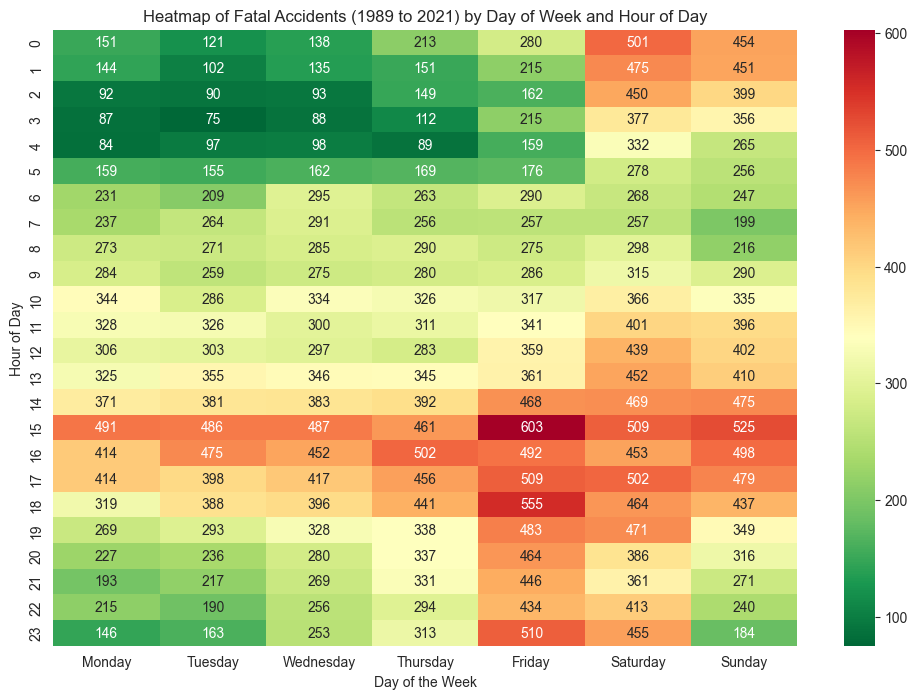

In [92]:
# We will create a new data frame for this visualisation because we have to do some manipulation that involves dropping rows. 

# Creating a new dataframe
heatmap_df = df[['Time', 'Dayweek']].copy()

# Dropping rows with missing values
heatmap_df = heatmap_df.dropna(subset=['Time'])

# Then we will extract the hour from the time field to make it easier to create a heatmap
heatmap_df['Hour'] = heatmap_df['Time'].str.split(':').str[0].astype(int)

# Next we need to create a pivot table to convert the data into wide format
pivot_table = pd.pivot_table(heatmap_df, 
                            values='Time', 
                            index=['Hour'], 
                            columns=['Dayweek'], 
                            aggfunc='count', 
                            fill_value=0)

# Finally plotting a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table[day_order], 
            annot=True, 
            cmap='RdYlGn_r', # Take a colour pallet from https://loading.io/color/feature/RdYlGn-9/ and use _r to flip it so that red is higher and green is lower
            fmt='g')
plt.title(f"Heatmap of Fatal Accidents ({earliest_year} to {latest_year}) by Day of Week and Hour of Day")
plt.xlabel('Day of the Week')
plt.ylabel('Hour of Day')
plt.show()


The above heatmap shows that the majority of fatal accidents occur at 3pm on Friday, and that Friday and Saturday afternoons have the highest number of fatal accidents.

### Change over time in the number of fatal accidents by year

We will now examine how these trends have changed over time. Firstly, we will create a line graph of the number of fatal accidents by year.

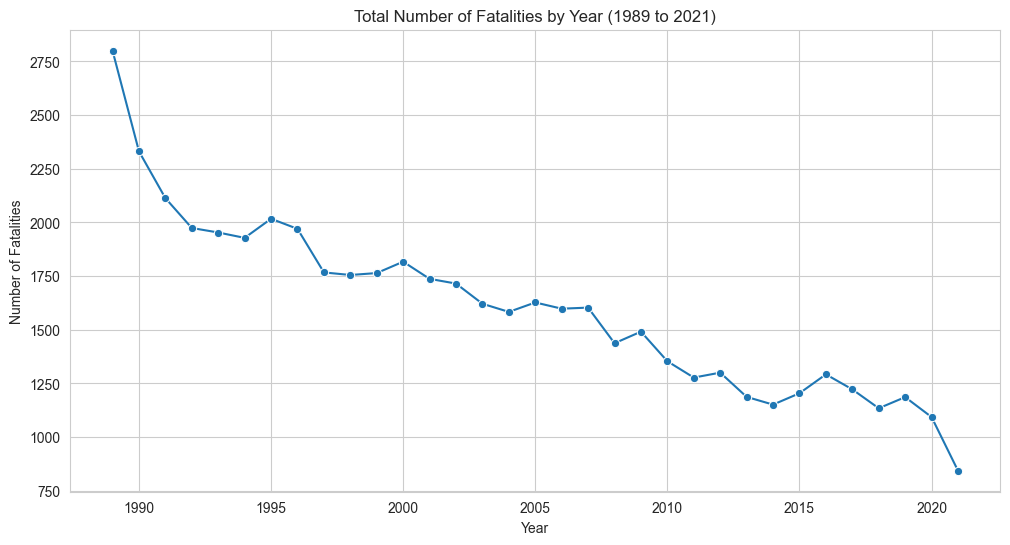

In [93]:
# Creating a line graph of fatalities by year
fatalities_per_year = df.groupby('Year')['Crash ID'].size().reset_index()
fatalities_per_year.columns = ['Year', 'Fatalities']

# Creating a Line Plot
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', 
            y='Fatalities',
            data=fatalities_per_year,
            marker="o")
plt.title(f"Total Number of Fatalities by Year ({earliest_year} to {latest_year})")
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
plt.grid(True)
plt.show()


We can see an overall decline in the number of fatal road transport accidents in Australia since 1989. The raw numbers are declining despite a growing population. To explore this trend further we will calculate the number of fatal accidents per 100,000 persons.

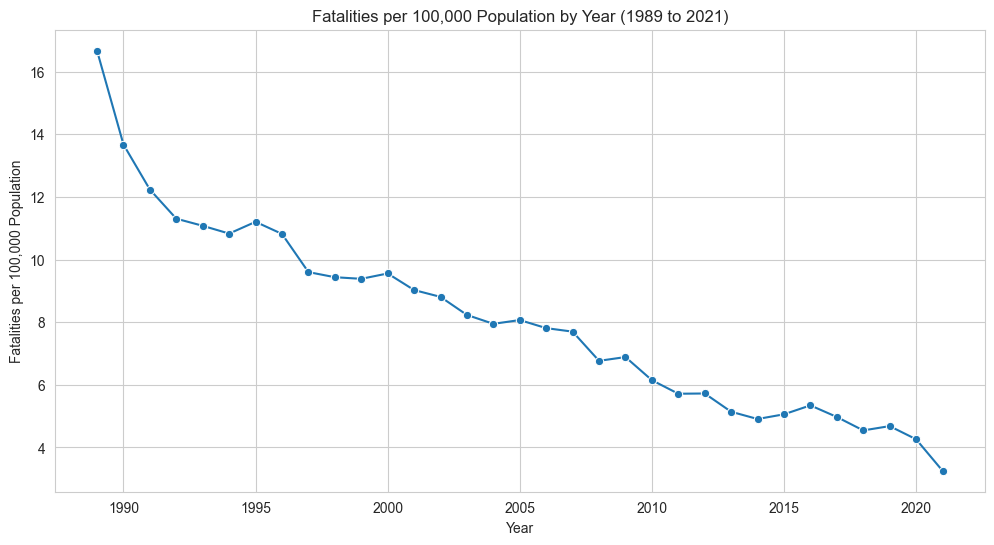

In [94]:
# We find population data for Australia from 1989 to 2021 from the United Nations website: https://population.un.org/dataportal/data/indicators/49/locations/36/start/1989/end/2021/table/pivotbylocation
# Using this data we create a dictionary with Year as the index. 

australian_population_data =  {
    'Year': list(range(1989, 2022)),
    'Population': [
        16796588, 17048003, 17271086, 17462504, 17631511, 17805504, 18003000, 
        18211845, 18410250, 18601667, 18800892, 19017963, 19248143, 19475844, 
        19698999, 19925056, 20171731, 20467030, 20830828, 21247873, 21660892, 
        22019168, 22357034, 22729269, 23111782, 23469579, 23820236, 24195701, 
        24590334, 24979230, 25357170, 25670051, 25921089
    ]
}

# Creating a dataframe from the dictionary
population_df = pd.DataFrame(australian_population_data)

# Merge the population data with the fatalities data
merged_df = pd.merge(fatalities_per_year, population_df, on='Year', how='inner')

# Calculate the number of fatalities per 100,000 people
merged_df['Fatalities per 100k'] = (merged_df['Fatalities'] / merged_df['Population']) * 100000

# Line plot of fatalities per 100,000 people
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', 
            y='Fatalities per 100k', 
            data=merged_df,
            marker="o")
plt.title(f"Fatalities per 100,000 Population by Year ({earliest_year} to {latest_year})")
plt.xlabel('Year')
plt.ylabel('Fatalities per 100,000 Population')
plt.grid(True)
plt.show()


The above line graphs shows a steady decline in both overall fatalities and fatalities per 100,000 in Australia. 

### Change over time in fatalities by gender

We will now examine if there has been a change in the distribution of fatal accidents by gender over time. 

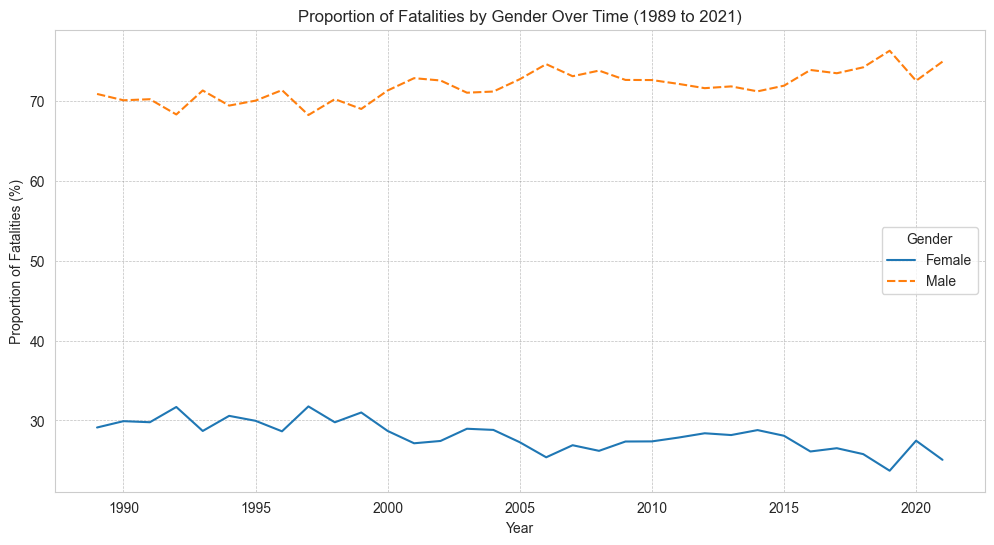

In [95]:
# Grouping the number of fatalities each year by gender
gender_fatalities = df.groupby(['Year', 'Gender'])['Crash ID'].size().reset_index(name='Fatalities')

# Calculating total fatalities per year
total_fatalities_per_year = gender_fatalities.groupby('Year')['Fatalities'].sum().reset_index(name='Total Fatalities')

# Merging the dataframes and calculating proportions
gender_fatalities = pd.merge(gender_fatalities, total_fatalities_per_year, on='Year')
gender_fatalities['Proportion'] = (gender_fatalities['Fatalities'] / gender_fatalities['Total Fatalities']) * 100

# Pivoting the data for easier plotting
gender_proportions_pivot = gender_fatalities.pivot(index='Year', columns='Gender', values='Proportion')

# Plotting
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.lineplot(data=gender_proportions_pivot)
plt.title(f"Proportion of Fatalities by Gender Over Time ({earliest_year} to {latest_year})")
plt.xlabel('Year')
plt.ylabel('Proportion of Fatalities (%)')
plt.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.5)
plt.legend(title='Gender')
plt.show()

The above line graph shows that the ratio of male to female road transport fatalities has remained relatively consistent over time.

### Change over time in fatalities by age group

We will now examine if there has been a change in the distribution of fatal accidents by age group over time.

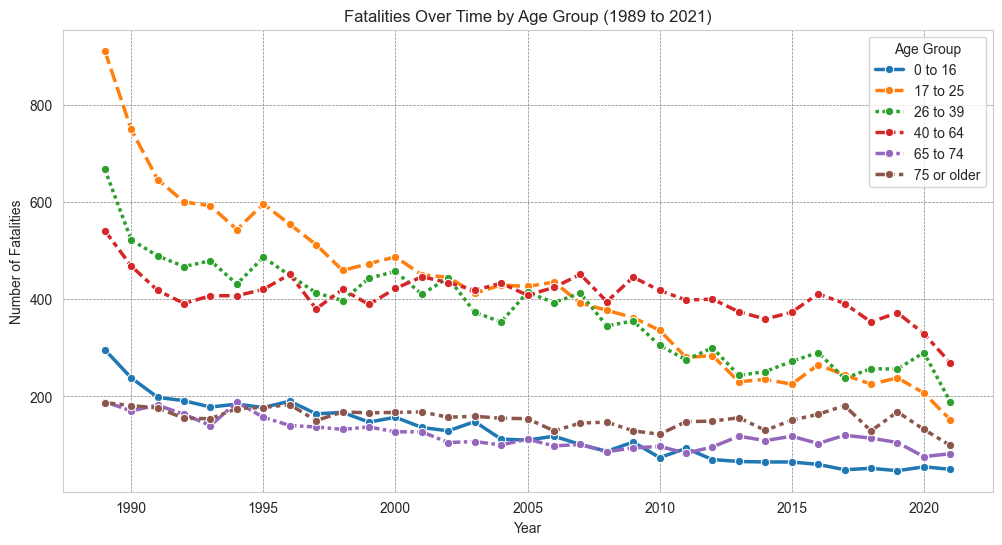

In [96]:
# Plotting
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.lineplot(data=age_group_fatalities_pivot, marker="o", linewidth=2.5) # Use the pivot table created earlier
plt.title(f"Fatalities Over Time by Age Group ({earliest_year} to {latest_year})")
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend(title='Age Group')
plt.show()

The above line graph shows that the number of fatalities has decreased over time for all age groups. The largest decrease has been in the 17-25 age group, possibly due to the introduction of restrictions on provisional license holders. We can also see that in the early 2000's, 40 to 64 year olds became the age group with the highest number of fatalities.

### Change over time in fatalities by road user type

Finally, we will examine if there has been a change in the distribution of fatal accidents by road user type over time. 

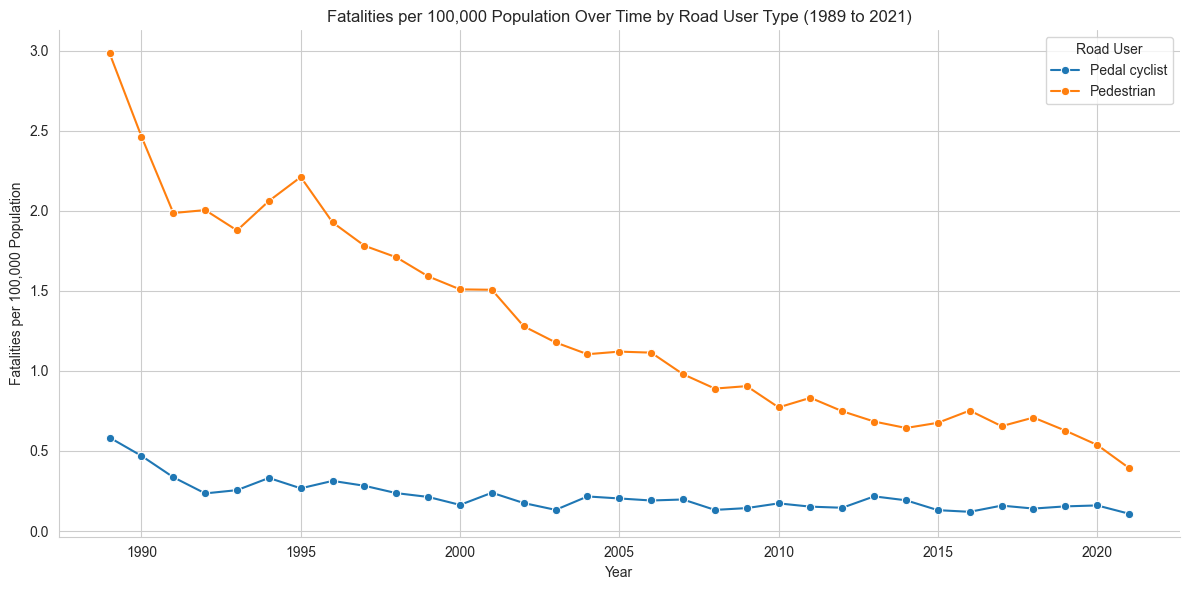

In [97]:
# Grouping data by year and road user type, and counting fatalities
ped_and_cyclist_fatalities = df[df['Road User'].isin(['Pedal cyclist', 'Pedestrian'])]

# Group data by Year and Road User, counting all Crash ID occurrences
fatalities_by_year_user = ped_and_cyclist_fatalities.groupby(['Year', 'Road User'])['Crash ID'].count().reset_index(name='Fatalities')

# Merge fatalities data with population data
fatalities_with_pop = pd.merge(fatalities_by_year_user, population_df, on='Year', how='left')

# Calculate fatalities per 100,000 people
fatalities_with_pop['Fatalities per 100k'] = (fatalities_with_pop['Fatalities'] / fatalities_with_pop['Population']) * 100000

# Pivot the data
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', 
            y='Fatalities per 100k',
            data=fatalities_with_pop, 
            hue='Road User', 
            marker="o")
plt.title(f"Fatalities per 100,000 Population Over Time by Road User Type ({earliest_year} to {latest_year})")
plt.xlabel('Year')
plt.ylabel('Fatalities per 100,000 Population')
plt.grid(True)
sns.despine()
plt.tight_layout()
plt.show()


The line graph above shows a steady decline in pedestrian fatalities since 1989, however cyclist fatalities have remained relatively consistent since the mid 1990's.

# Part 4: Conclusion

This exploratory analysis examined the demographic, geographic, and temporal distribution of fatal road transport accidents in Australia, focusing on changes from 1989 to 2021.

Key findings include:
- A significant overall decline in fatalities, both in absolute terms and per 100,000 population.
- The largest reduction occurred among 17–25-year-old drivers, potentially linked to licensing reforms targeting provisional license holders.
- Males consistently account for approximately 70% of road fatalities throughout the observed period.
- Fatal accidents are most concentrated between Friday and Sunday, with Friday afternoons posing the highest risk.
- New South Wales, Victoria, and Queensland collectively represent over 80% of national road fatalities.
- Pedestrian fatalities have decreased over time, while cyclist fatalities have remained relatively stable since the mid-1990s.

## Opportunities for Further Research

This dataset focuses solely on fatal accidents. Expanding future analyses to include injury data could provide a more comprehensive understanding of road safety trends.  
Additionally, examining the injury-to-fatality ratio among pedestrians and cyclists could offer insights into the effectiveness of vehicle design improvements and road safety initiatives aimed at protecting vulnerable road users.


